<a href="https://colab.research.google.com/github/sulimankhan587/CNN_Car_Detection/blob/main/Holistic_Approch_up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Key Steps Explained:

##1. Data Preprocessing:

- Each dataset is reshaped into a pivot table, where rows are years, and columns are entities (countries/regions).
- Missing values are filled with 0 for simplicity

##2. Feature Scaling:

- Normalized the data to ensure all features contribute equally during training.

##3. Sequence Creation:

- Built sequences for time series forecasting with a defined sequence length (seq_length).

##4. Model Architecture:

- Used a stacked LSTM model with dropout for regularization.

##5. Training and Evaluation:

- Evaluated the model on Mean Absolute Error (MAE) and visualized predictions against actual values.




In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

arrivals = pd.read_csv('/content/drive/MyDrive/dataset/Research-2/archive/1- international-tourist-arrivals-by-region-of-origin.csv')
same_day = pd.read_csv('/content/drive/MyDrive/dataset/Research-2/archive/16- international-same-day-arrivals.csv')
departures = pd.read_csv('/content/drive/MyDrive/dataset/Research-2/archive/18- international-tourist-departures.csv')
trips = pd.read_csv('/content/drive/MyDrive/dataset/Research-2/archive/4- international-tourist-trips.csv')


In [ ]:
# Step 2: Data Preprocessing
def preprocess_data(df, value_column):
    df = df[['Entity', 'Code', 'Year', value_column]].dropna()
    df = df.pivot(index='Year', columns='Entity', values=value_column)
    return df

arrivals_processed = preprocess_data(arrivals, 'International tourist arrivals by region')
same_day_processed = preprocess_data(same_day, 'Inbound arrivals (same day)')
departures_processed = preprocess_data(departures, 'Outbound departures (tourists)')
trips_processed = preprocess_data(trips, 'Inbound arrivals (tourists)')

In [ ]:
# Combine datasets by aligning on the year
combined_data = pd.concat([arrivals_processed, same_day_processed, departures_processed, trips_processed], axis=1)
combined_data.fillna(0, inplace=True)

In [ ]:
# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(combined_data)

In [ ]:
# Step 3: Prepare Data for Time Series Forecasting
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 5
X, y = create_sequences(scaled_data, seq_length)

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (17, 5, 474)
Shape of X_test: (5, 5, 474)
Shape of y_train: (17, 474)
Shape of y_test: (5, 474)


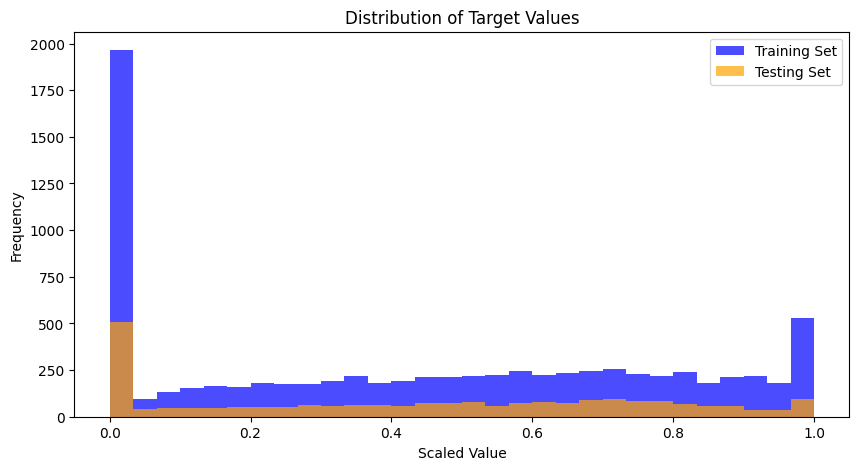

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(y_train.flatten(), bins=30, alpha=0.7, label="Training Set", color='blue')
plt.hist(y_test.flatten(), bins=30, alpha=0.7, label="Testing Set", color='orange')
plt.title("Distribution of Target Values")
plt.xlabel("Scaled Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()


## LSTM Model

In [ ]:
# Step 4: Build the LSTM Model
model = Sequential([
    LSTM(128, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(64, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(y_train.shape[1])
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Step 5: Train the Model
epochs = 500
batch_size = 32
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 0.0121 - mae: 0.0750 - val_loss: 0.0258 - val_mae: 0.0845
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0118 - mae: 0.0761 - val_loss: 0.0258 - val_mae: 0.0846
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 0.0108 - mae: 0.0703 - val_loss: 0.0258 - val_mae: 0.0847
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.0106 - mae: 0.0676 - val_loss: 0.0259 - val_mae: 0.0848
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0101 - mae: 0.0662 - val_loss: 0.0259 - val_mae: 0.0848
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0105 - mae: 0.0702 - val_loss: 0.0259 - val_mae: 0.0849
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0095 - mae: 0.0650 - val_loss: 0.0259 - val_mae: 0.0849
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0112 - mae: 0.0691 - val_loss: 0.0260 - val_mae: 0.0850
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0114 - ma

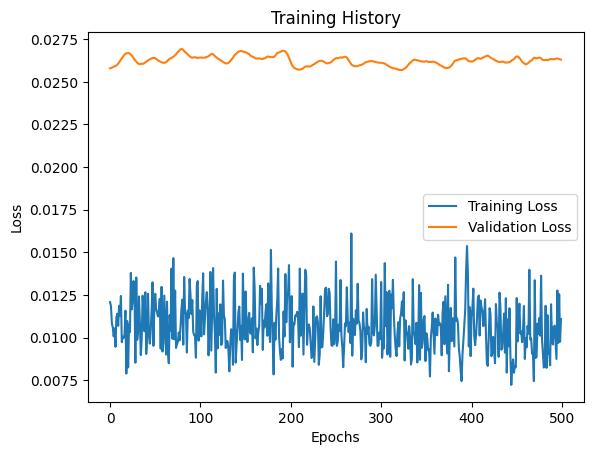

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training History")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


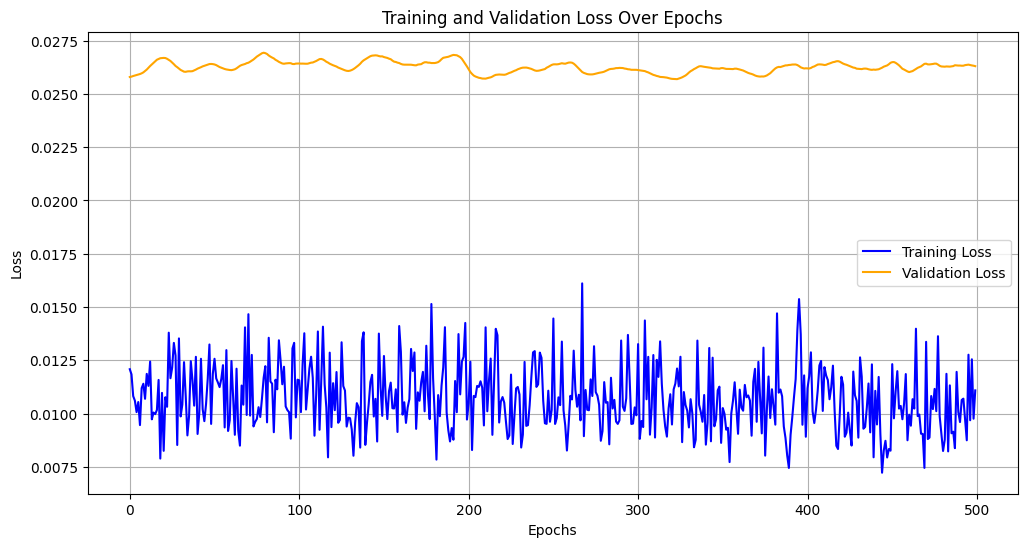

In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title("Training and Validation Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Step 6: Evaluate the Model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}, Test MAE: {mae}")



Test Loss: 0.02629884146153927, Test MAE: 0.08403617143630981


In [ ]:
# Step 7: Make Predictions
predictions = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [ ]:
for i in range(5):  # Display the first 5 examples
    print(f"Actual: {y_test[i]}, Predicted: {predictions[i]}")

Actual: [0.         0.         0.90593669 0.60070985 0.48488242 0.
 0.58894231 0.10818713 0.         0.34246575 0.18872102 0.6992
 0.         0.0498155  0.         0.37535599 0.78599222 0.34449093
 0.         0.07373737 0.         0.97773017 0.53419689 0.
 0.36490251 0.         0.44141689 0.46478873 0.24955595 0.81588448
 0.         0.4        0.         0.39626556 0.1419295  0.57352941
 0.08247423 0.68998471 0.         0.72164948 0.31524927 0.
 0.         0.         0.27237354 0.         0.14429838 0.5046729
 0.64157119 0.         0.34463277 0.13710692 0.11827328 0.
 0.12626532 0.15642458 0.         0.         0.23793103 0.39781591
 0.42917766 0.45194384 0.28804348 0.11070496 0.63013699 0.0686901
 0.47852761 0.21925718 0.         0.44425676 0.91458967 0.08547799
 0.         0.68411782 0.77777778 0.15841584 0.         0.60296097
 0.5443038  1.         0.26666667 0.23602484 0.44444444 0.38793103
 0.         0.62048193 0.10019646 0.03763441 0.3880597  0.
 1.         0.9877571  0.        

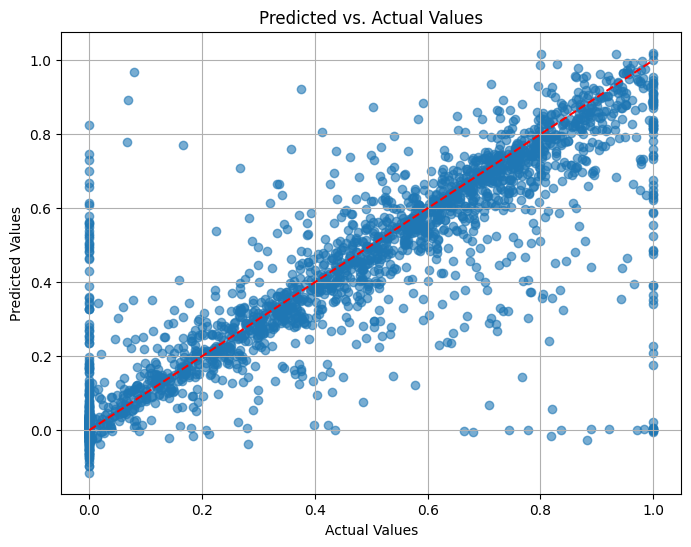

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test.flatten(), predictions.flatten(), alpha=0.6)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Perfect prediction line
plt.title("Predicted vs. Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()


## Inverse Transform Predictions and Ground Truth

In [ ]:
# Step 8: Inverse Transform Predictions and Ground Truth
predictions_inverse = scaler.inverse_transform(predictions)
y_test_inverse = scaler.inverse_transform(y_test)


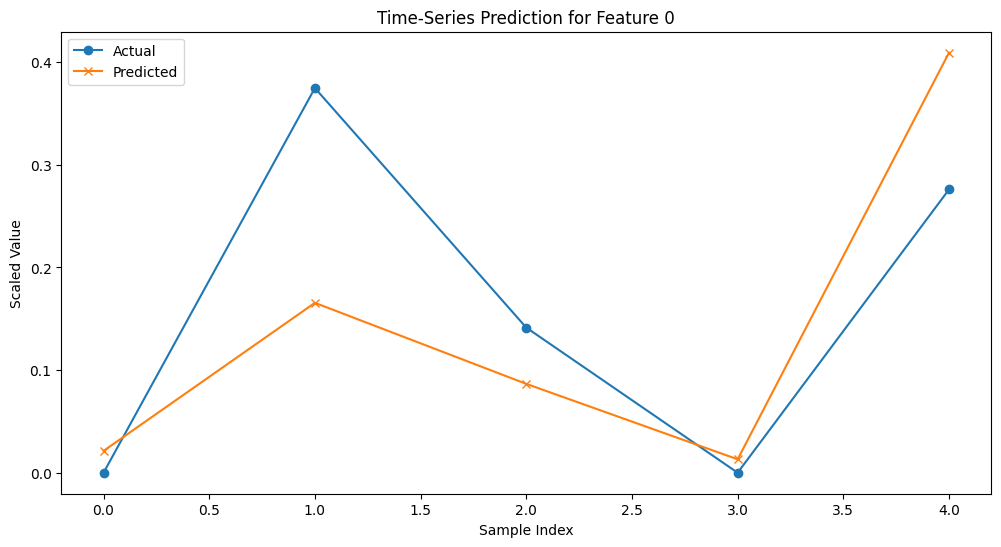

In [ ]:
feature_idx = 0  # Replace with the desired feature index
plt.figure(figsize=(12, 6))
plt.plot(y_test[:, feature_idx], label="Actual", marker='o')
plt.plot(predictions[:, feature_idx], label="Predicted", marker='x')
plt.title(f"Time-Series Prediction for Feature {feature_idx}")
plt.xlabel("Sample Index")
plt.ylabel("Scaled Value")
plt.legend()
plt.show()


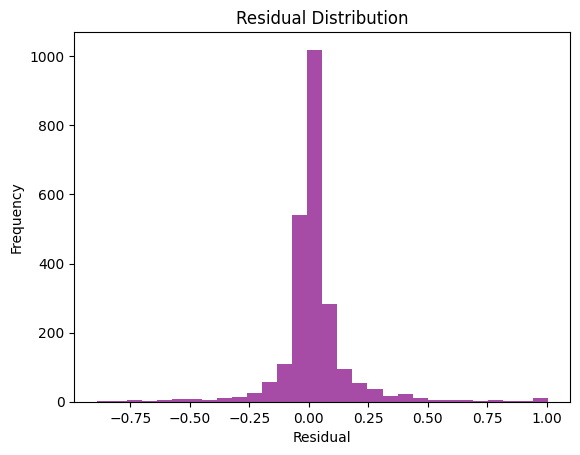

In [ ]:
residuals = y_test - predictions
plt.hist(residuals.flatten(), bins=30, alpha=0.7, color='purple')
plt.title("Residual Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 0.08403616905998215


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.026298842645741786


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print(f"R² Score: {r2}")


R² Score: -0.3368405482276547


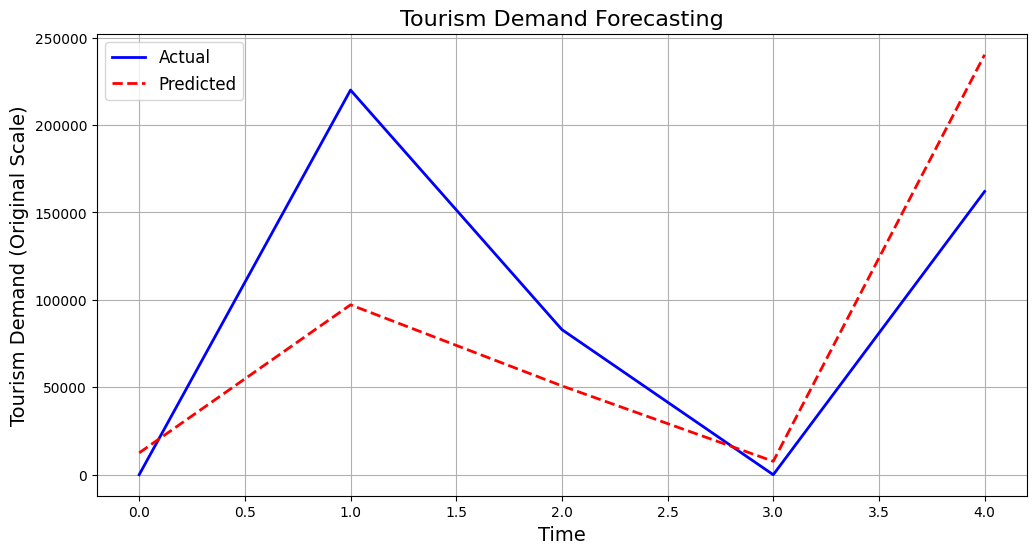

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse[:, 0], label='Actual', color='blue', linewidth=2)
plt.plot(predictions_inverse[:, 0], label='Predicted', color='red', linestyle='--', linewidth=2)
plt.title('Tourism Demand Forecasting', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Tourism Demand (Original Scale)', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)
plt.show()


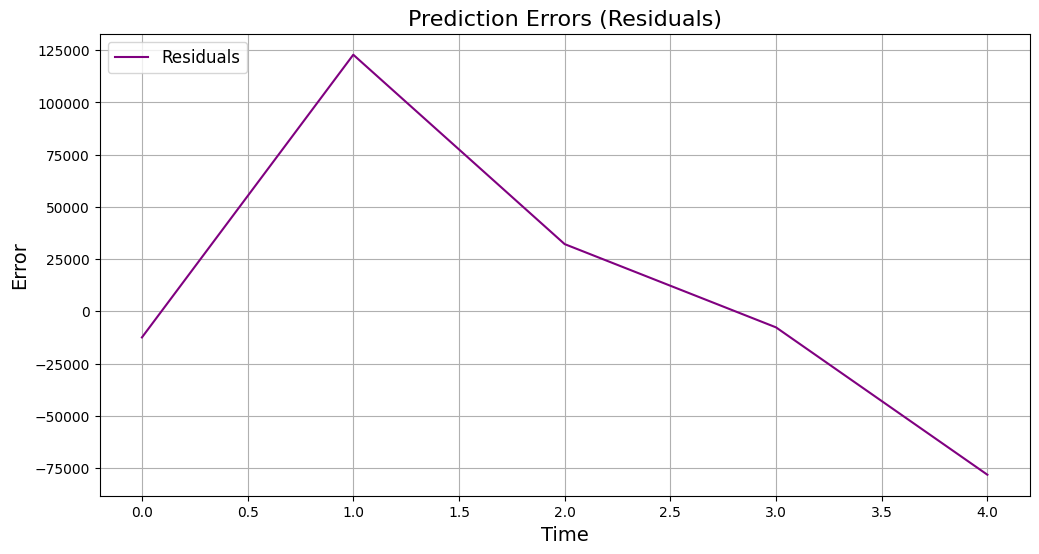

In [ ]:
residuals = y_test_inverse[:, 0] - predictions_inverse[:, 0]
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals', color='purple')
plt.title('Prediction Errors (Residuals)', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)
plt.show()


## LSTM and Batch Normalization Model

In [ ]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
# Step 4: Build the Enhanced LSTM Model
model = Sequential([
    LSTM(128, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(64, activation='relu', return_sequences=True),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(32, activation='relu', return_sequences=False),
    BatchNormalization(),
    Dropout(0.2),
    Dense(y_train.shape[1])
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

In [ ]:
# Step 5: Train the Model
epochs = 500
batch_size = 64
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 0.4579 - mae: 0.5547 - val_loss: 0.2886 - val_mae: 0.4309
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - loss: 0.4584 - mae: 0.5578 - val_loss: 0.2879 - val_mae: 0.4303
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.4396 - mae: 0.5471 - val_loss: 0.2870 - val_mae: 0.4296
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - loss: 0.4333 - mae: 0.5367 - val_loss: 0.2861 - val_mae: 0.4290
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - loss: 0.4358 - mae: 0.5428 - val_loss: 0.2852 - val_mae: 0.4284
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.4333 - mae: 0.5434 - val_loss: 0.2844 - val_mae: 0.4280
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 0.4453 - mae: 0.5488 - val_loss: 0.2835 - val_mae: 0.4276
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.4292 - mae: 0.5393 - val_loss: 0.2826 - val_mae: 0.4272
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.4105 -

Test Loss: 0.026496391743421555, Test MAE: 0.09104114025831223
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


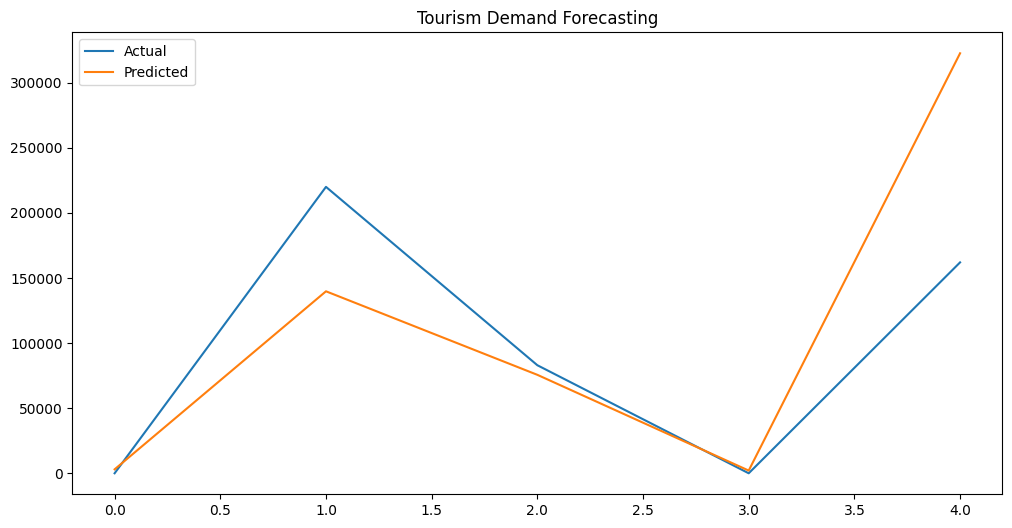

In [ ]:

# Step 6: Evaluate the Model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}, Test MAE: {mae}")

# Step 7: Make Predictions
predictions = model.predict(X_test)

# Step 8: Inverse Transform Predictions and Ground Truth
predictions_inverse = scaler.inverse_transform(predictions)
y_test_inverse = scaler.inverse_transform(y_test)

# Step 9: Visualize Results
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse[:, 0], label='Actual')
plt.plot(predictions_inverse[:, 0], label='Predicted')
plt.legend()
plt.title('Tourism Demand Forecasting')
plt.show()

# Applications


**Tourism Policy Planning:**
Use predictions to inform strategies for recovering from disruptions (e.g., pandemics, economic crises).
Highlight regions or tourism types (e.g., inbound, same-day) with strong recovery potential.

**Seasonal Trend Analysis:**

Use the model to analyze seasonal variations and optimize resource allocation.

**Scenario Forecasting:**

Extend the model to simulate different scenarios (e.g., changes in international policies, economic growth rates).